# Project 3
## An analysis of the Twitter use of Donald Trump and Barack Obama - Part 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import shelve
from collections import Counter 
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import itertools
from nltk import bigrams 
 

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
with shelve.open('result/vars1') as db:
    obama = db['obama']
    trump = db['trump']

First, we want to clean up the words they tweeted

In [3]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+.)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z].')", # words with - and '
    r'(?:[\w_]+.)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
  
def preprocess(s, lowercase=False):
    tokens = tokens_re.findall(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

Next, we count all the number of words, unique words, and number of characters they used and restore them in the datafram.

In [4]:
obama_cleaned_words = [preprocess(i) for i in obama.text]
obama['n_words'] = pd.Series([len(obama_cleaned_words[i]) for i in range(len(obama_cleaned_words))])
obama_uwords = [len(np.unique((np.array(preprocess(x))))) for x in obama.text]
obama['n_uwords'] = pd.Series(obama_uwords)
obama_chars = [len(x) for x in obama.text]
obama['n_chars'] = pd.Series(obama_chars)
obama.head()

,created_at,text,n_words,n_uwords,n_chars
0,2017-10-16 22:59:00,I'm grateful to @SenJohnMcCain for his lifetim...,22,21,137
1,2017-10-02 12:41:00,Michelle &amp; I are praying for the victims i...,25,22,146
2,2017-09-30 02:22:00,Proud to cheer on Team USA at the Invictus Gam...,23,22,137
3,2017-09-26 17:03:00,We're expanding our efforts to help Puerto Ric...,25,23,146
4,2017-09-25 23:36:00,"Prosecutor, soldier, family man, citizen. Beau...",21,18,141


In [5]:
trump_cleaned_words = [preprocess(i) for i in trump.text]
trump['n_words'] = pd.Series([len(trump_cleaned_words[i]) for i in range(len(trump_cleaned_words))])
trump_uwords = [len(np.unique((np.array(preprocess(x))))) for x in trump.text]
trump['n_uwords'] = pd.Series(trump_uwords)
trump_chars = [len(x) for x in trump.text]
trump['n_chars'] = pd.Series(trump_chars)
trump.head()

,created_at,text,n_words,n_uwords,n_chars
0,2017-10-23 12:30:00,I had a very respectful conversation with the ...,22,22,132
1,2017-10-23 11:53:00,Two dozen NFL players continue to kneel during...,24,23,142
2,2017-10-23 11:42:00,There will be NO change to your 401(k). This h...,28,27,129
3,2017-10-22 12:08:00,It is finally sinking through. 46% OF PEOPLE B...,24,24,139
4,2017-10-22 12:02:00,Wacky Congresswoman Wilson is the gift that ke...,27,25,144


Next, we want to compare them by looking at statistics

In [6]:
pd.options.display.precision = 2
obama.describe()

,n_words,n_uwords,n_chars
count,3207.00,3207.00,3207.00
mean,17.29,16.48,116.56
std,4.83,4.33,22.66
min,2.00,2.00,28.00
25%,14.00,14.00,102.00
50%,17.00,17.00,122.00
75%,20.00,19.00,135.00
max,33.00,30.00,157.00


In [7]:
trump.describe()

,n_words,n_uwords,n_chars
count,3232.00,3232.00,3232.00
mean,20.70,19.40,124.83
std,6.91,6.16,31.06
min,1.00,1.00,10.00
25%,17.00,16.00,112.00
50%,22.00,21.00,137.00
75%,26.00,24.00,142.00
max,41.00,31.00,208.00


### Visualization: Explore some of the relationships between the twitters, their authors, and time.

Pandas has its own object for time series. Since we have a whole vector with creation dates, we can construct time series respect tweets lengths, likes and retweets. And if we want to plot the time series, pandas already has its own method in the object. We can plot a time series as follows:


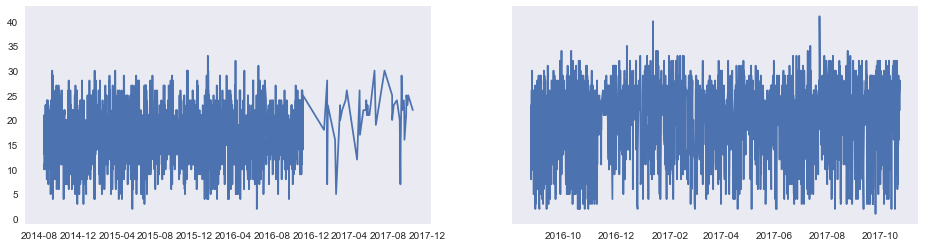

In [8]:
fig,axes = plt.subplots(1, 2, figsize = (16,4), sharey= True)
axes[0].plot_date(x=obama.created_at, y = obama.n_words,linestyle = '-',marker='None')
axes[1].plot_date(x=trump.created_at, y = trump.n_words,linestyle='solid',marker='None')
plt.savefig("fig/n_word_comparison.png")

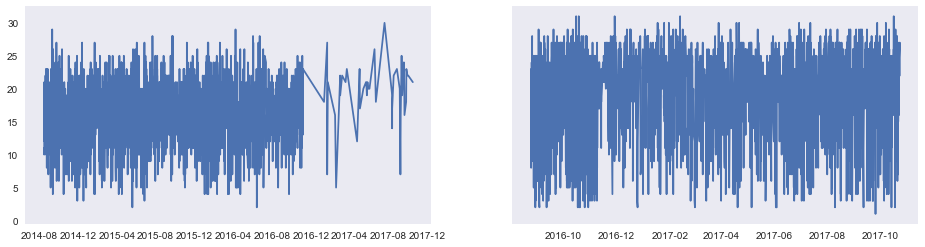

In [9]:
fig,axes = plt.subplots(1, 2, figsize = (16,4), sharey= True)
axes[0].plot_date(x=obama.created_at, y = obama.n_uwords,linestyle = '-',marker='None')
axes[1].plot_date(x=trump.created_at, y = trump.n_uwords,linestyle='solid',marker='None')
plt.savefig("fig/n_uword_comparison.png")

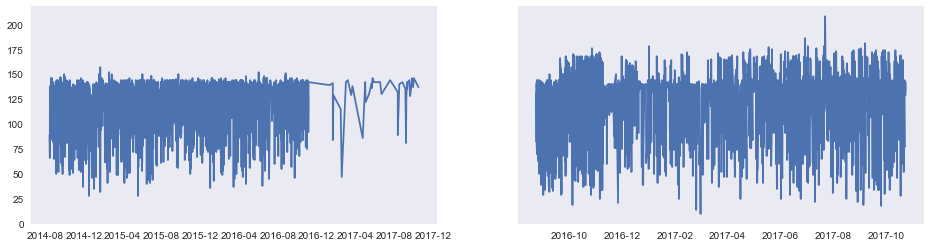

In [10]:
fig,axes = plt.subplots(1, 2, figsize = (16,4), sharey= True)
axes[0].plot_date(x=obama.created_at, y = obama.n_chars,linestyle = '-',marker='None')
axes[1].plot_date(x=trump.created_at, y = trump.n_chars,linestyle='solid',marker='None')
plt.savefig("fig/n_char_comparison.png")

In order to keep track of the frequencies while we are processing the tweets, we can use collections.Counter() which internally is a dictionary (term: count) with some useful methods like most_common():

In [11]:
count_all = Counter()
terms_all = [term for term in list(itertools.chain.from_iterable(obama_cleaned_words))]
count_all.update(terms_all)
# Print the first 5 most frequent words
print(count_all.most_common(5))

[('the ', 2018), ('to ', 1670), ('"', 1388), ('a ', 882), ('Obama ', 848)]


The above code will produce some unimpressive results:

[('the ', 2018), ('to ', 1670), ('"', 1388), ('a ', 882), ('Obama ', 848)]

As you can see, the most frequent words (or should I say, tokens), are not exactly meaningful.

In every language, some words are particularly common. While their use in the language is crucial, they don’t usually convey a particular meaning, especially if taken out of context. This is the case of articles, conjunctions, some adverbs, etc. which are commonly called stop-words. Thus, we try to do the stop-word removal. And it's one important step.

In [12]:
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via']

In [13]:
terms_stop = [term for term in list(itertools.chain.from_iterable(obama_cleaned_words)) if term not in stop]
count_stop = Counter()
count_stop.update(terms_stop)

print(count_stop.most_common(5))

[('the ', 2018), ('to ', 1670), ('a ', 882), ('Obama ', 848), ('s ', 820)]


After counting, sorting the terms and printing the top 5, this is the result:

[('the ', 2018), ('to ', 1670), ('a ', 882), ('Obama ', 848), ('s ', 820)]

It's very similar with the last output. But we remove the '"'.

Besides stop-word removal, we can further customise the list of terms/tokens we are interested in. There are many term filters.

In [14]:
# Count terms only once, equivalent to Document Frequency
terms_single = set(terms_all)
count_single = Counter()
count_single.update(terms_single)

print(count_single.most_common(5))

[('Ever ', 1), ('http://t.co/LH2npSuNR4', 1), ("doesn'", 1), ('mothers ', 1), ('#HappyHanukkah', 1)]


In [15]:
# Count hashtags only
terms_hash = [term for term in list(itertools.chain.from_iterable(obama_cleaned_words)) 
              if term.startswith('#')]
count_hash = Counter()
count_hash.update(terms_hash)

print(count_hash.most_common(5))

[('#ActOnClimate', 294), ('#DoYourJob', 150), ('#SOTU', 124), ('#GetCovered', 114), ('#Obamacare', 76)]


In [16]:
# Count terms only (no hashtags, no mentions)
terms_only = [term for term in list(itertools.chain.from_iterable(obama_cleaned_words)) 
              if term not in stop and
              not term.startswith(('#', '@'))] 
              # mind the ((double brackets))
              # startswith() takes a tuple (not a list) if 
              # we pass a list of inputs
count_only = Counter()
count_only.update(terms_only)

print(count_only.most_common(5))

[('the ', 2018), ('to ', 1670), ('a ', 882), ('Obama ', 848), ('s ', 820)]


In [17]:

terms_bigram = bigrams(terms_stop)
count_bigram = Counter()
count_bigram.update(terms_bigram)

print(count_bigram.most_common(5))

[(('äóîPresident ', 'Obama '), 452), (('President ', 'Obama '), 380), (('RT ', '@WhiteHouse:'), 194), (('äóîPresident ', 'Obama'), 169), (('of ', 'the '), 154)]


The bigrams() function from NLTK will take a list of tokens and produce a list of tuples using adjacent tokens. Notice that we could use terms_all to compute the bigrams, but we would probably end up with a lot of garbage. In case we decide to analyse longer n-grams (sequences of n tokens), it could make sense to keep the stop-words, just in case we want to capture phrases like “to be or not to be”.

So after counting and sorting the bigrams, this is the result:

[(('äóîPresident ', 'Obama '), 452), (('President ', 'Obama '), 380), (('RT ', '@WhiteHouse:'), 194), (('äóîPresident ', 'Obama'), 169), (('of ', 'the '), 154)]

# Intermediate results
Let's save some intermediate results for further analysis. This lets us work on subsequent notebooks without rerunning this one. We use python builtin shelve module for simple Python variables. We'll create for each notebook variable stores with the notebook number for python variables (vars1.db, vars2.db, etc.). These will all go into the `results/` subdirectory.

In [18]:
obama.to_hdf('result/n2.h5','obama',table=True,mode='a')
trump.to_hdf('result/n2.h5','trump',table=True,mode='a')

with shelve.open('result/vars2') as db:
    db['obama'] = obama[['created_at', 'text']]
    db['trump'] = trump[['created_at', 'text']]